<h1 style="text-align:right;font-size:140%;color:#000000; font-family: 'XB Zar';"> <strong>فصل 2  - یک پروژه یادگیری ماشین: از آغاز تا پایان</strong>
</h1>
<hr>



<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">در این فصل، یک پروژه یادگیری ماشین را از صفر تا صد انجام می‌دهیم. در این مثال، در قالب یک متخصص داده‌پردازی فرو می‌رویم که به تازگی در یک شرکت سرمایه‌گذاری املاک و مستغلات استخدام شده است. توجه داشته باشید که این یک پروژه‌ی یادگیری ماشین خیالی است و هدف آن آموزش خرید و فروش ملک و آپارتمان نیست!<br><br>
مراحل اصلی یک پروژه‌ی یادگیری ماشین عبارتند از:</p>


<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
  
1. [**کلیات پروژه را بررسی کرده و چارچوب مسئله را مشخص کنید.**](#1)
2. [**داده‌های مورد نیاز را جمع‌آوری کنید.**](#2)
3. [**برای به دست آوردن شناخت بهتر، داده‌ها را کاوش و تجسم کنید.**](#3)
4. [**داده‌ها را برای ورود به الگوریتم ماشین آماده کنید.**](#4)
5. [**یک مدل انتخاب کرده و آن را آموزش دهید.**](#5)
6. [**تنظیمات مدل را برای رسیدن به بهترین کارایی (دقت) بهینه کنید.**](#6)
7. [**راه‌حل خود را ارائه دهید.**](#7)
8. [**سیستم را راه‌اندازی، پایش و نگهداری کنید.**](#8)
    
</div>


<h1 style="text-align:right;font-size:120%; direction: rtl;direction: rtl; color:#000000; font-family: 'XB Zar';">&#128165;در ادامه، این 8 گام به صورت پله به پله بررسی و پیاده‌سازی می‌شوند.</h1><br><hr>

<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">ابتدا، چند ماژول رایج را وارد می‌کنیم و اطمینان حاصل می‌کنیم که MatplotLib شکل‌ها را به صورت درون‌خطی نمایش می‌دهد. سپس یک تابع برای ذخیره کردن شکل‌ها آماده می‌کنیم. همچنین بررسی می‌کنیم که نسخه Python 3.5 یا بالاتر نصب شده باشد. اگرچه Python 2.x ممکن است کار کند، اما منسوخ شده است و به شدت توصیه می‌کنیم از Python 3 استفاده کنید. علاوه بر این، باید نسخه 0.20 یا بالاتر Scikit-Learn نیز نصب شده باشد.</p>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



<hr><br><h1 style="text-align:right;font-size:120%; direction: rtl;direction: rtl; color:#5B0F6D; font-family: 'XB Zar';"><strong>گام اول : کلیات پروژه را بررسی کرده و چارچوب مسئله را مشخص کنید.</strong></h1><a id='1'></a>


<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">
اولین قدم برای اجرای پروژه یادگیری ماشین شرکت سرمایه گذاری املاک و مستغلات این است که داده‌های آماری مورد نیاز برای ساخت مدل را دریافت کنیم. این اطلاعات شامل جمعیت، میانگین درآمد ساکنان و میانگین قیمت خانه برای تعداد زیادی از مجتمع‌های مسکونی در ایالت کالیفرنیا است.
</p>
<p style="text-align:right;font-size:120%; direction: rtl; color:#000000; font-family: 'XB Zar';">
بهترین منبع برای یافتن اطلاعات اولیه درباره‌ی یک پروژه رئیس شرکت (یا مدیر پروژه) است، و اولین پرسشی که باید از این رئیس بپرسیم این است که هدف کسب و کار او دقیقاً چیست. مسلماً ساختن یک مدل یادگیری ماشین! هدف غایی هیچ کسب و کاری نیست، بلکه باید دید شرکت چه انتظاراتی از این مدل دارد. دانستن هدف کسب و کار بسیار مهم است، چون در واقع همین هدف است که تعیین می‌کند چه مسأله‌ای را باید حل کنیم، چه الگوریتمی برای حل آن انتخاب کنیم، چه مقدار تلاش برای تنظیم دقیق مدل به خرج دهیم.
</p>


In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
pip list

Package                   Version
------------------------- ----------
aiofiles                  23.2.1
aiohttp                   3.9.3
aiosignal                 1.3.1
altair                    5.2.0
annotated-types           0.6.0
anyio                     4.2.0
appdirs                   1.4.4
apyori                    1.1.2
asttokens                 2.4.1
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.9.1
beautifulsoup4            4.12.2
behave                    1.2.6
bip32utils                0.3.post4
bitarray                  2.9.2
blinker                   1.7.0
cached-property           1.5.2
cachier                   1.5.3
certifi                   2023.7.22
cffi                      1.15.1
chardet                   4.0.0
charset-normalizer        2.0.12
click                     7.1
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cryptography              3.4.8
cycler                


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


AttributeError: 'Axes' object has no attribute 'is_first_col'

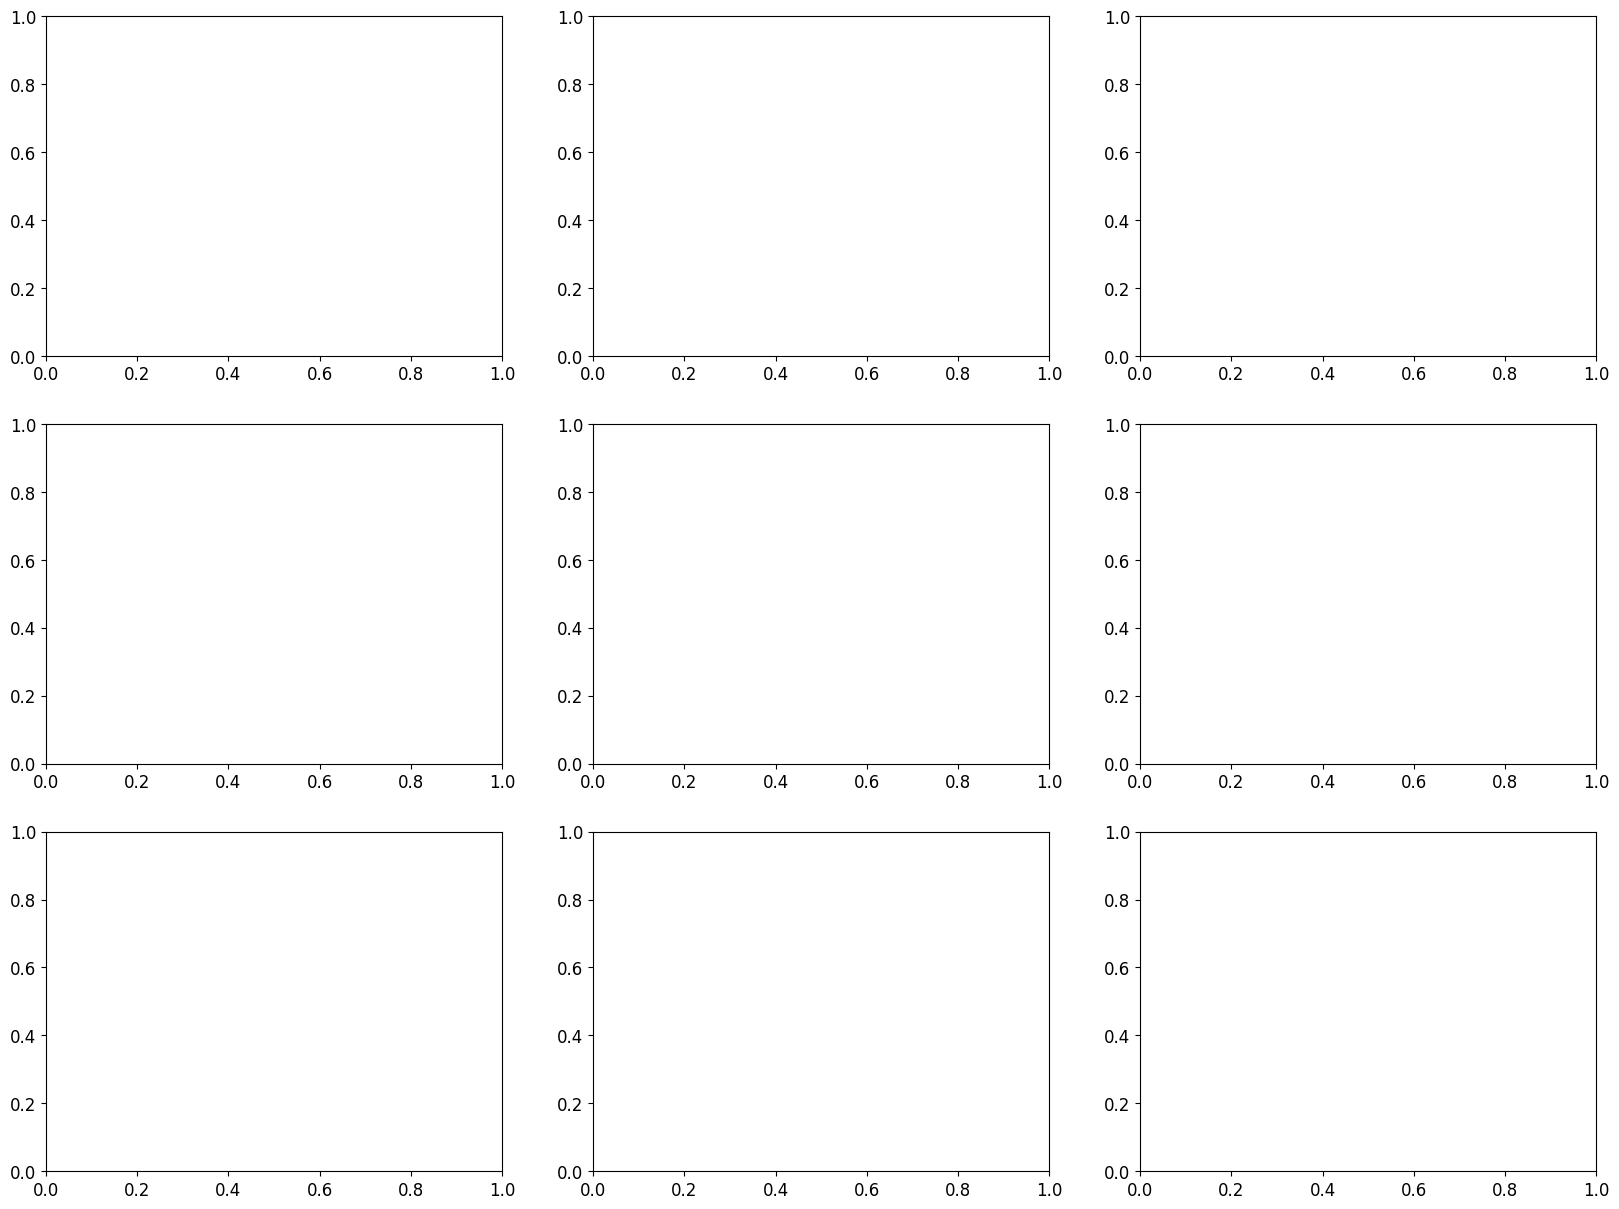

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()